In [ ]:
import numpy as np
from matplotlib import pyplot as plt

The clusters found in the map may not be totally accurate or informative if a SOM is given too little or too much irrelevant details in the weights.

In [ ]:
# Customized function for ploting weights to visualize clusters


CONSTANT_SIZE = 100

def plot_data(w_20,w_40,w_100,w_1000):
  # Plot
  w_20 = w_20.reshape(CONSTANT_SIZE,CONSTANT_SIZE,3)
  w_40 = w_40.reshape(CONSTANT_SIZE,CONSTANT_SIZE,3)
  w_100 = w_100.reshape(CONSTANT_SIZE,CONSTANT_SIZE,3)
  w_1000 = w_1000.reshape(CONSTANT_SIZE,CONSTANT_SIZE,3)

  plt.figure(figsize=(7, 7))
  plt.title('sigma=1')
  
  plt.subplot(221)
  plt.title('epoch=20')
  plt.imshow(w_20)

  plt.subplot(222)
  plt.title('epoch=40')
  plt.imshow(w_40)

  plt.subplot(223)
  plt.title('epoch=100')
  plt.imshow(w_100)

  plt.subplot(224)
  plt.title('epoch=1000')
  plt.imshow(w_1000)

In [ ]:
# Training data of 24 shades of colors
color_codes =np.array([[250,128,114],[240,128,128],[220,20,60],[255,0,0],[128,0,0],[255,99,71],
                  [135,206,235],[70,130,180],[106,90,205],[65,105,225],[0,0,255],[0,0,139],
                  [50,205,50],[0,128,0],[0,100,0],[144,238,144],[46,139,87],[128,128,0],
                  [255,255,224],[255,255,0],[0,128,128],[64,224,208],[255,192,203],[255,20,147]])

color_names = ['salmon','light_coral','crimson','red','maroon','tomato',
               'sky_blue','steel_blue','slate_blue','royal_blue','blue','dark_blue',
               'lime_green','green','dark_green','light_green','sea_green','olive',
               'light_yellow','yellow','teal','turquoise','pink','deep_pink']

# normalize to [0,1]
color_codes = color_codes/255


Weights for neurons can be prepared beforehand or randomly initialised. The SOM will inevitably converge to a final mapping, therefore random initialization is usually sufficient. Pre-generating neuron weights, on the other hand, can significantly reduce convergence time.

In [ ]:
# Random initialization of weights before learning process

def initialise_random_weights(size):
  CONSTANT_SIZE = size
  weights = np.empty([CONSTANT_SIZE*CONSTANT_SIZE,3]) 
  for i in range(0,CONSTANT_SIZE*CONSTANT_SIZE):
    for j in (0,1,2):
      weights[i][j] = np.random.randint(0,256)/255
  return weights

In [ ]:
def initialise_output_grid(size):
  CONSTANT_SIZE = size
  output_grid = np.zeros((CONSTANT_SIZE*CONSTANT_SIZE,2))
  k=0
  for i in range(CONSTANT_SIZE):
    for j in range(CONSTANT_SIZE):
      output_grid[k,:] = [i,j]
      k = k+1
  return output_grid

In [ ]:
weights =initialise_random_weights(100)
output_grid = initialise_output_grid(100)

The weights of neurons are modified according to their proximity to "winning" neurons (i.e. neurons that most closely resemble a sample input). Similar neurons cluster together after training on numerous repetitions of input data sets, and vice versa.

In [ ]:
# Functions to find the winning neurons and update weights for winning neurons and their neighbourhood (Cooperation)
def get_winner(x,w):
  dist = get_distance(x,weights) 
  winner_index = dist.argmin()
  return winner_index

In [ ]:
# define functions to calculate the distance
def get_distance(x, weights):
  dist = []
  for w in weights:
    d = np.linalg.norm(x-w)
    dist.append(d)
  return np.array(dist)


The final weight values of neurons are determined using a competitive learning process that modifies them to resemble surrounding "winning" neurons. The final map is made up of groupings of comparable neurons as a result of this process.

The radius of the neighbourhood function is frequently reduced over time, reducing the number of "neighbours" as training advances. This is done to assist neurons in adjusting their weights to roughly where they wish to be before allowing them to converge without being significantly influenced by "winning" neurons located far away.
The following formula determines the amount to change each "neighbour."

$\ N_{ij}(𝑘) = exp{\frac{-d_{ij}^2}{2𝜎^2(𝑘)}}$

In [ ]:
# Weight update using competative learning

def update_weights(lr,sigma,x,w):
    weights_new = np.empty([CONSTANT_SIZE*CONSTANT_SIZE,3])
    i = get_winner(x, w)   
    d1 = np.ceil(i / CONSTANT_SIZE)
    d2 = np.mod(i , CONSTANT_SIZE)
    d = get_distance(np.array([d1, d2]), output_grid)     
    s = np.argmin(d)

    for j in range(0,len(weights)):
      h = np.exp(-d[j]*d[j]/(2 * sigma **2))
      #print(h)     
      weights[j] = w[j] + lr*h * (x - w[j])
    return weights


The amount to modify each "neighbour" by can also be adjusted over time, similar to the neighbourhood function, so that the first neuron weight adjustment is abrupt but is less easily impacted as training goes.

$\ 𝜎(𝑘) = 𝜎_{o} = exp{\frac{-K}{T}}$

In [ ]:
# define functions following the learning rate and sigma changing rules
def learning_rate_decay(k,T,lr_0):
  return lr_0* np.exp(-k/T)

In [ ]:
def sigma_decay(k,T,sigma_0):
  return sigma_0*np.exp(-k/T)

SOMs convert multidimensional data into lower-dimensional subspaces, where geometric relationships between points reflect how similar they are. SOMs use an unsupervised learning neural network trained with a competitive learning algorithm to generate subspaces.

In [ ]:
# Competative weight update for different epochs and sigma values

def SOM_learning(sigma_0):
  T = 1000
  lr_0 = 0.8
  lr = lr_0
  sigma = sigma_0
  saved_weights = []
  temp_arr =np.zeros((10000,3))
  w_20 = temp_arr.copy()
  w_40 = temp_arr.copy()
  w_100 = temp_arr.copy()
  w_1000 = temp_arr.copy()
  weights = initialise_random_weights(100)

  for n in range(0,T):
    
    i = np.random.randint(0,24)
    weights = update_weights(lr,sigma,color_codes[i],weights)
    lr = learning_rate_decay(n,T,lr_0)
    sigma = sigma_decay(n,T,sigma_0)
    if (n==19):
      w_20 = weights.copy()
    if (n==39):
      w_40 = weights.copy()
    if (n==99):
      w_100 = weights.copy()
    if (n==999):
      w_1000 = weights.copy()
  plot_data(w_20,w_40,w_100,w_1000)

The functions are som learning using different sigma_0 values, please notice the comments as  "change sigma_0 here"  to to replicate the output.

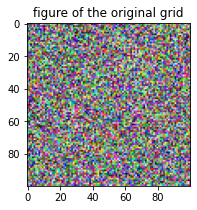

In [ ]:
# generate a figure of the original grid (random weights)
weights2 =initialise_random_weights(100)
weights2 = weights2.reshape(CONSTANT_SIZE,CONSTANT_SIZE,3)
plt.figure(figsize=(3, 3))
plt.title('figure of the original grid')
plt.imshow(weights2)

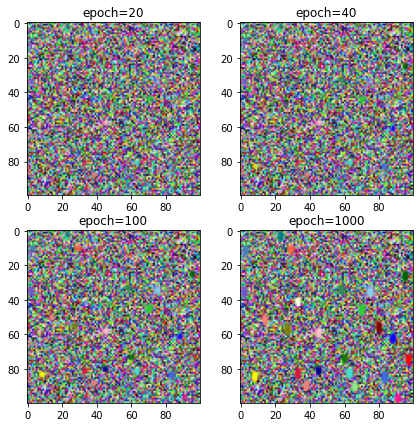

In [ ]:
SOM_learning(sigma_0=1) #change sigma_0 here

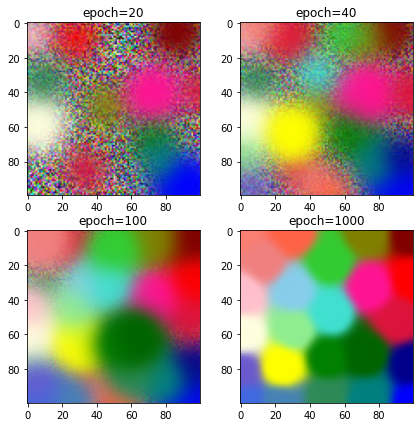

In [ ]:
SOM_learning(sigma_0=10) #change sigma_0 here

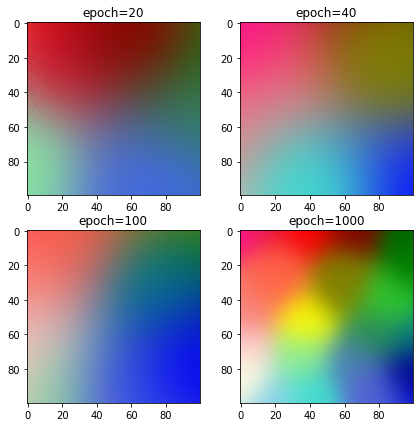

In [ ]:
SOM_learning(sigma_0=30) #change sigma_0 here

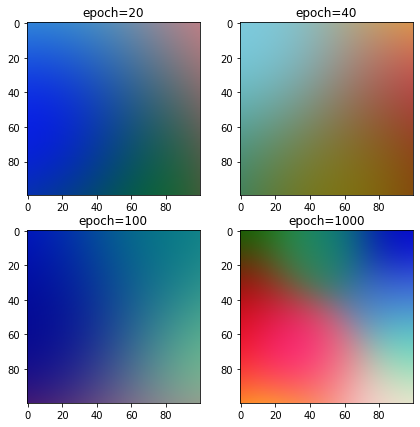

In [ ]:
SOM_learning(sigma_0=50) #change sigma_0 here

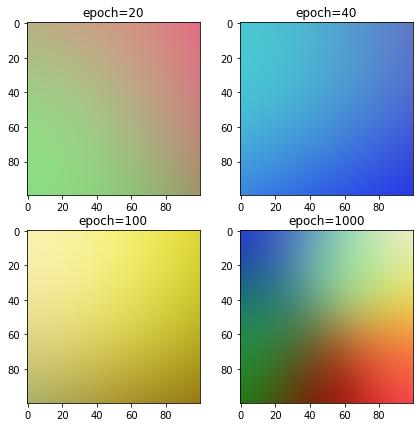

In [ ]:
SOM_learning(sigma_0=70) #change sigma_0 here

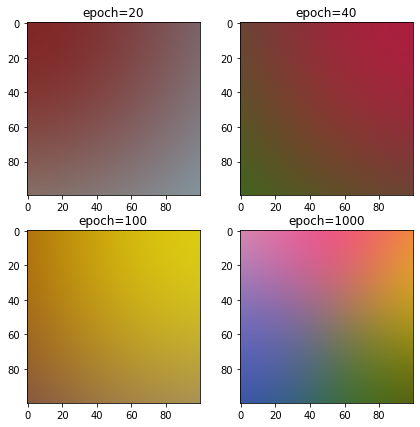

In [ ]:
SOM_learning(sigma_0=100) #change sigma_0 here

**Analysis:**


The neighbourhood function is typically constructed to have a global maximum at the "winning" neuron and decrease as it moves further away. This causes neurons near the "winning" neuron to be scaled the most towards the sample input, while neurons further away are scaled the least, resulting in clusters of similar neurons in the final map.

From figure 1, all the weights in original conditiona are random and thus looks scattered. The idea behind self organizing maps is mapping a higher dimensional data into lower dimensional plane such that similar inputs will appear closer (geometrically closer) in resulting output space. For this purpose different sigma values and epochs combinations are considered. 

As we are increasing the number of epochs the random input vector gets mapped to more sorted (focused) clusters of the similar input colours. Results are more sorted with increase in number of epochs, this indicates a better mapping of inputs with increase in no of epochs for learning. This can be observed for lower sigma values more clearly.

As we are increasing the value of sigma, resulting colours in output are reducing significantly, this indicates that for higher sigma values, variety of input colours are mapped to a particular parent colour which indicates the loss of information.

sigma = 10 and epoch = 1000 is giving better clustering for the given input data of 24 colours spread randomly across input plane.